
# Project: Telecom Churn

### The main aim of this project is to predict the Churn-flag variable  with the values  YES(1)  OR NO(0) based on the given feature which can be highlighted in service applications to serve the customer better. 

# Project Goal

#### 1. Understanding the variables that are influencing the customers to migrate.
#### 2. Creating Churn risk scores that can be indicative to drive retention campaigns.
#### 3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.
#### 4. Exporting the trained model with prediction capability for CHURN-FLAG, which can be highlighted in service applications to serve the customer better.

## All the Lifecycle In A Data Science Projects


In [1]:
#Fetch the data from given database

In [2]:
from sqlalchemy import create_engine
import pandas as pd

## Data Analysis  Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

from collections import Counter
from scipy import stats
from pylab import rcParams

In [3]:
username='dm_team3'
userpass='dm_team15119#'
db_host='18.136.56.185'
db_name= 'project_telecom'

In [4]:
#create connection
conn=create_engine('mysql+pymysql://' +username+':'+userpass+'@'+db_host+'/'+db_name)
conn.table_names()

['telecom_churn_data']

In [5]:
query='select * from telecom_churn_data'
data=pd.read_sql(query,conn)
print(data.shape)


(4617, 21)


In [6]:
data.rename(columns={'columns1':'State','columns2':'AccountLength','columns3':'AreaCode','columns4':'Phone','columns5':'InternationalPlan',
                   'columns6':'VMailPlan','columns7':'VMailMessage','columns8':'DayMins',
                 'columns9':'DayCalls','columns10':'DayCharge','columns11':'EveMins','columns12':'EveCalls',
                  'columns13':'EveCharge','columns14':'NightMins','columns15':'NightCalls','columns16':'NightCharge',
                  'columns17':'InternationalMins','columns18':'Internationalcalls','columns19':'InternationalCharge','columns20':'CustServCalls','columns21':'Churn'},inplace=True)

In [7]:
#covert dataset to csv
data.to_csv('churn.csv')

In [8]:
#read from csv
data=pd.read_csv('churn.csv',index_col=0)

In [9]:
#check missing values

data.isnull().sum().sum()# No missing values

0

#### The sum of all null values including columns and rows is 0.That means there is no missing values in dataset.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                4617 non-null   object 
 1   AccountLength        4617 non-null   int64  
 2   AreaCode             4617 non-null   int64  
 3   Phone                4617 non-null   object 
 4   InternationalPlan    4617 non-null   object 
 5   VMailPlan            4617 non-null   object 
 6   VMailMessage         4617 non-null   int64  
 7   DayMins              4617 non-null   float64
 8   DayCalls             4617 non-null   int64  
 9   DayCharge            4617 non-null   float64
 10  EveMins              4617 non-null   float64
 11  EveCalls             4617 non-null   int64  
 12  EveCharge            4617 non-null   float64
 13  NightMins            4617 non-null   float64
 14  NightCalls           4617 non-null   int64  
 15  NightCharge          4617 non-null   f

#### dataset has 22 features where four feature columns:State,Phone,VMailPlan ,InternationalPlan,Churn are Objects/Categorical Features and left Feature coulmns are  Numerical Type :float64(8), int64(9).

In [11]:
data.describe()


,AccountLength,AreaCode,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### This describes the almost every aspect of the statistical point of view of the dataset. All the columns which are Numerical are always considered. we can see count (the number of data in that column), mean (the average of the data),unique(the number of unique categories in each feature).Account length and area code does not matter for describing the dataset because they are jus codes. Where as the parameters related to Day, Eve, Night and international gives us the usage insight of the data

In [12]:
col=data.columns
for i in col:
    print('The mode---- ',i ,'----accorrence of',stats.mode(data[i])[0] ,'is',stats.mode(data[i])[1])

The mode----  State ----accorrence of ['WV'] is [149]
The mode----  AccountLength ----accorrence of [90] is [63]
The mode----  AreaCode ----accorrence of [415] is [2299]
The mode----  Phone ----accorrence of [' 327-1058'] is [1]
The mode----  InternationalPlan ----accorrence of [' no'] is [4171]
The mode----  VMailPlan ----accorrence of [' no'] is [3381]
The mode----  VMailMessage ----accorrence of [0] is [3381]
The mode----  DayMins ----accorrence of [154.] is [10]
The mode----  DayCalls ----accorrence of [102] is [108]
The mode----  DayCharge ----accorrence of [26.18] is [10]
The mode----  EveMins ----accorrence of [169.9] is [10]
The mode----  EveCalls ----accorrence of [105] is [111]
The mode----  EveCharge ----accorrence of [14.25] is [15]
The mode----  NightMins ----accorrence of [186.2] is [10]
The mode----  NightCalls ----accorrence of [105] is [115]
The mode----  NightCharge ----accorrence of [9.66] is [19]
The mode----  InternationalMins ----accorrence of [9.8] is [81]
The mo

### AreaCode [415] has highest corrence 2299 out of 4617.MailPlan and AccountLength has majority NO of data.The target feature Churn has  frequancy of Flase is high that means people doesn't churn 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000144FD69EC48>,
      dtype=object)

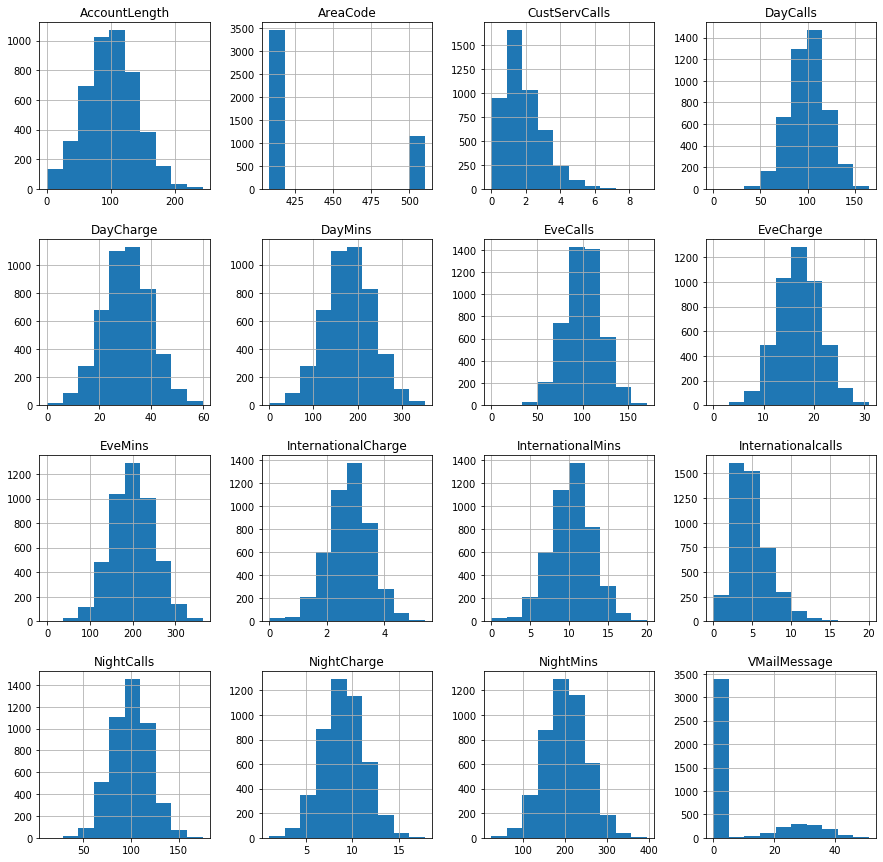

In [13]:
data.hist(figsize=(15,15))



### Histogram shows the distribution of data.Here data is Quite normally ditributed but some of are skewed.

In [14]:
#check the skewness of data
data.skew()  #skewness is between -1.96 to +1.96

AccountLength          0.106248
AreaCode               1.135333
VMailMessage           1.326734
DayMins               -0.002948
DayCalls              -0.081013
DayCharge             -0.002952
EveMins               -0.005280
EveCalls              -0.017554
EveCharge             -0.005252
NightMins              0.020515
NightCalls             0.030886
NightCharge            0.020507
InternationalMins     -0.220891
Internationalcalls     1.366420
InternationalCharge   -0.221342
CustServCalls          1.046800
dtype: float64

In [15]:
data.kurtosis() #shows the sharpness of curve

AccountLength         -0.092552
AreaCode              -0.686039
VMailMessage           0.123526
DayMins               -0.042399
DayCalls               0.196147
DayCharge             -0.042264
EveMins                0.043630
EveCalls               0.135980
EveCharge              0.043522
NightMins              0.061409
NightCalls             0.068815
NightCharge            0.061380
InternationalMins      0.671602
Internationalcalls     3.302927
InternationalCharge    0.672518
CustServCalls          1.515026
dtype: float64

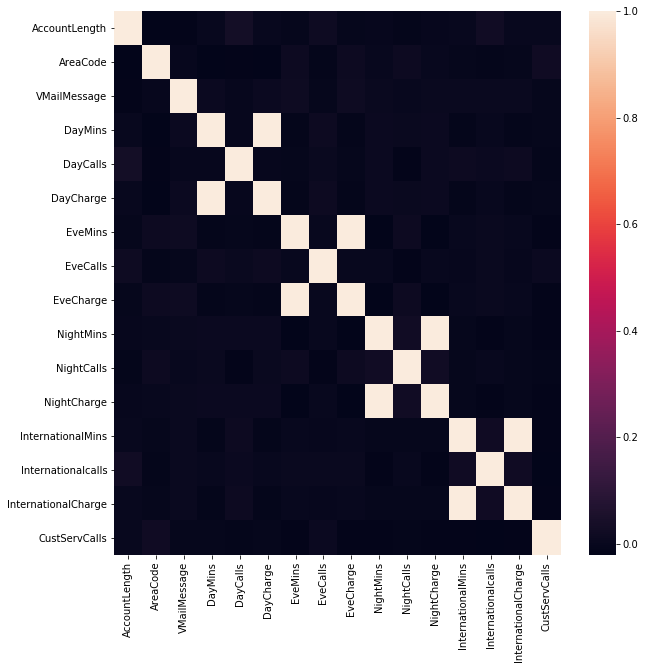

In [16]:

rcParams['figure.figsize']=[10,10]
sb.heatmap(data.corr())

#### The data in dataset is not highly correlated to expecation of min and charge  .Thus we can take any of these parameter.

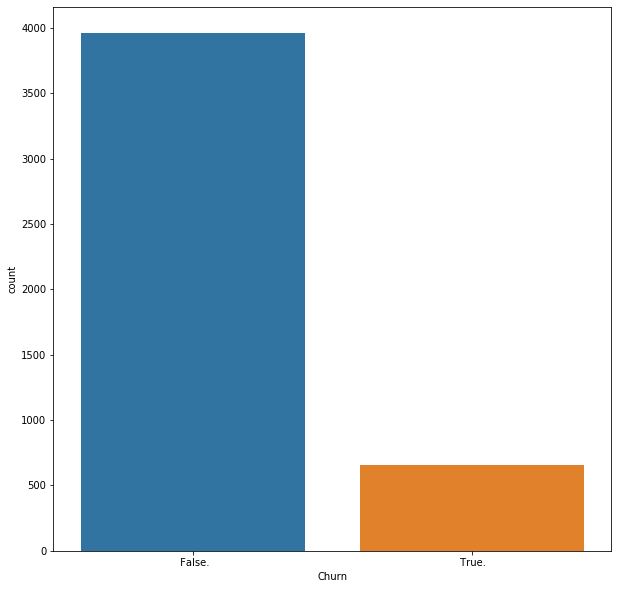

In [17]:
sb.countplot(data.Churn)

In [18]:
data.head()

,State,AccountLength,AreaCode,Phone,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


 ## number of categorical feature

In [19]:
categorial_feature=[feature for feature in data.columns if data[feature].dtype=='object']
categorial_feature

['State', 'Phone', 'InternationalPlan', 'VMailPlan', 'Churn']

In [20]:
print('Number of categorical features :{}'.format(len(categorial_feature)))

Number of categorical features :5


In [21]:
for feature in categorial_feature:
    print('the feature is',feature,'and the number of categories are',len(data[feature].unique()))

the feature is State and the number of categories are 51
the feature is Phone and the number of categories are 4617
the feature is InternationalPlan and the number of categories are 2
the feature is VMailPlan and the number of categories are 2
the feature is Churn and the number of categories are 2


In [22]:
import plotly
import plotly.express as px
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [23]:
#connect plotly offline to jupyter 
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [24]:
# plotly.express for State vs Churn
px.bar(data,x='State',y='Churn',color='State')

### New jersey has highest churn rate according to visualization

In [25]:
#We have to drop phone feature from dataset 

In [26]:
data.drop('Phone',axis=1,inplace=True)

## number of numerical type features columns

In [27]:
numerical_feature=[feature for feature in data.columns if data[feature].dtypes!='object']
data[numerical_feature]

,AccountLength,AreaCode,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,510,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,408,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,408,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,415,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [28]:
print('Number of numerical_variables  :{}'.format(len(numerical_feature)))

Number of numerical_variables  :16


# Outliers

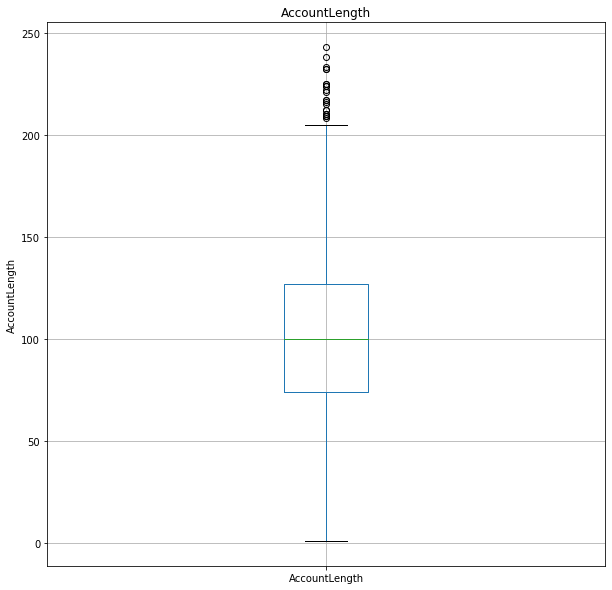

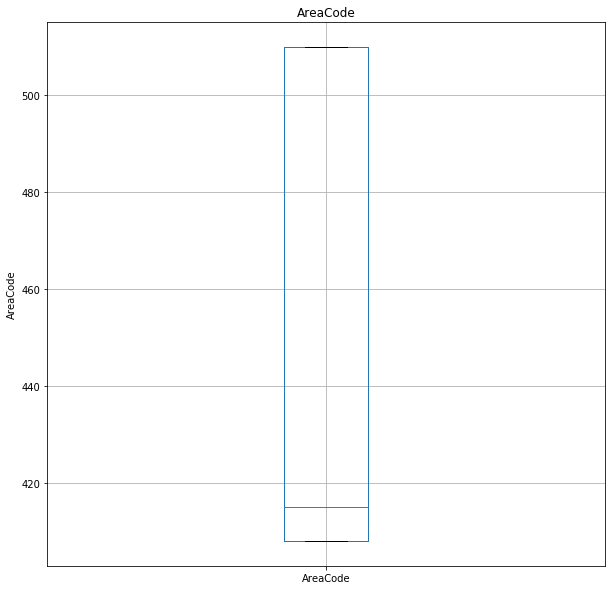

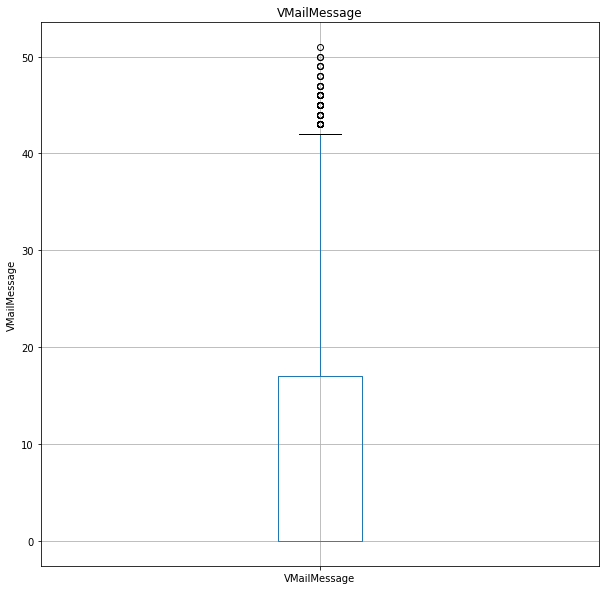

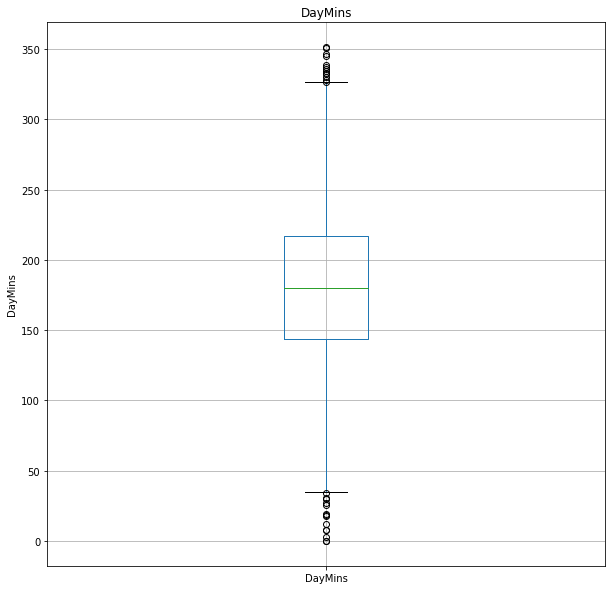

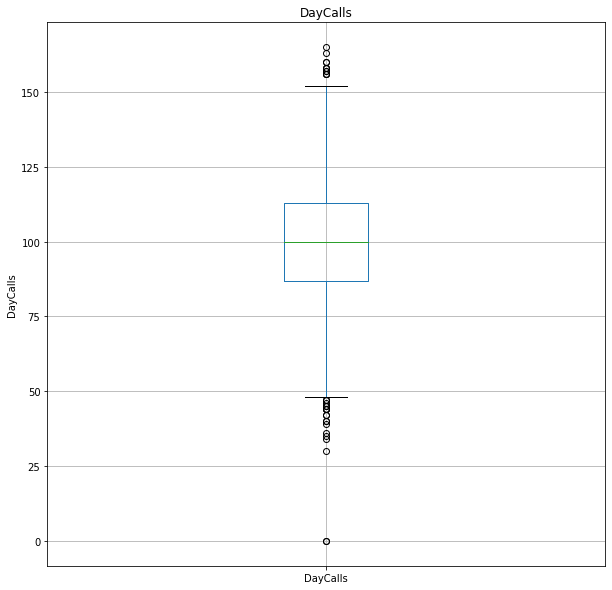

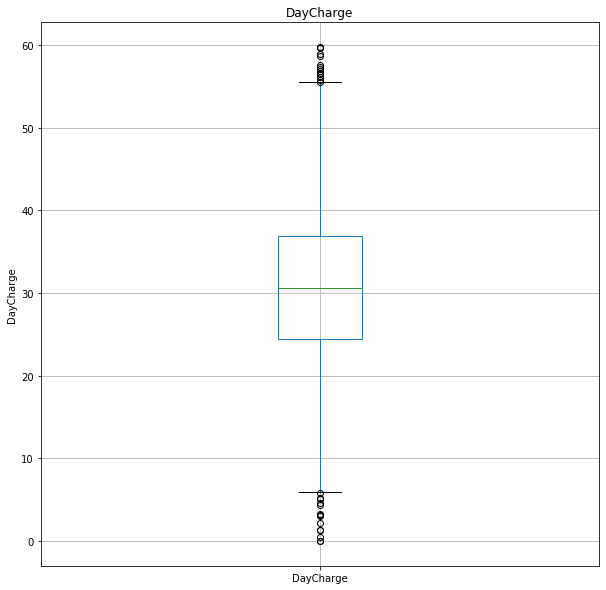

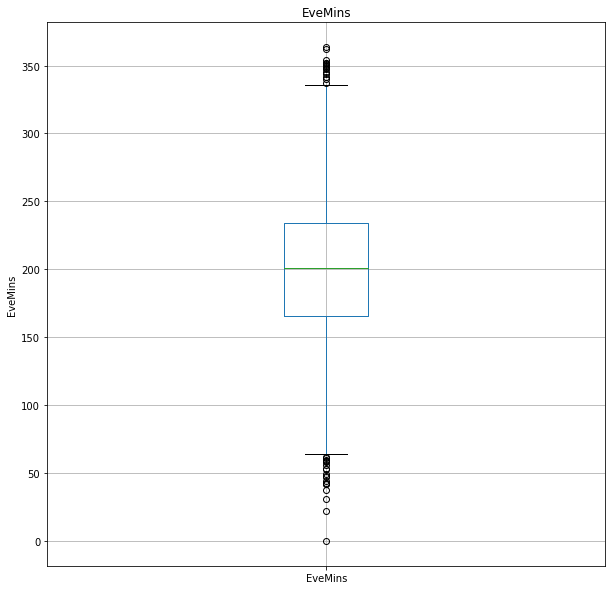

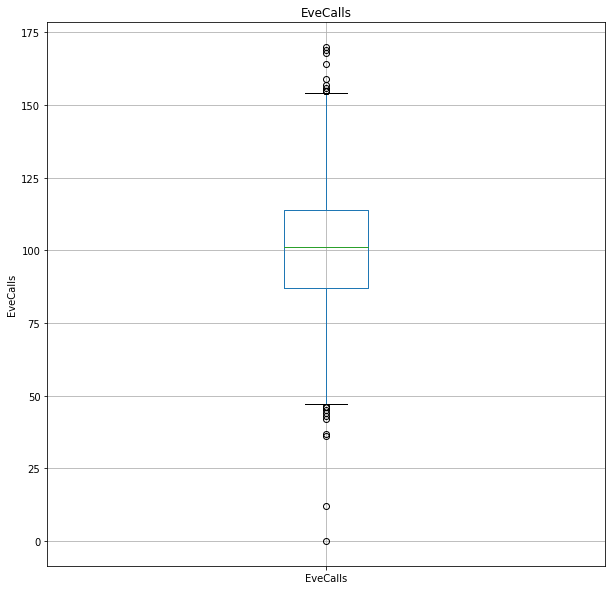

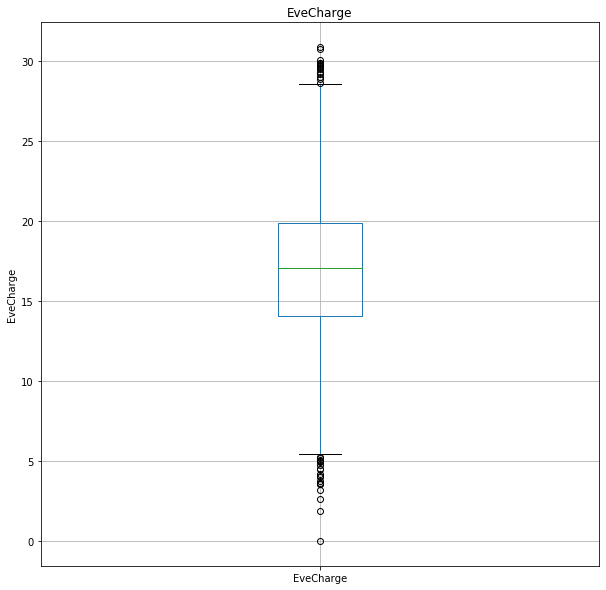

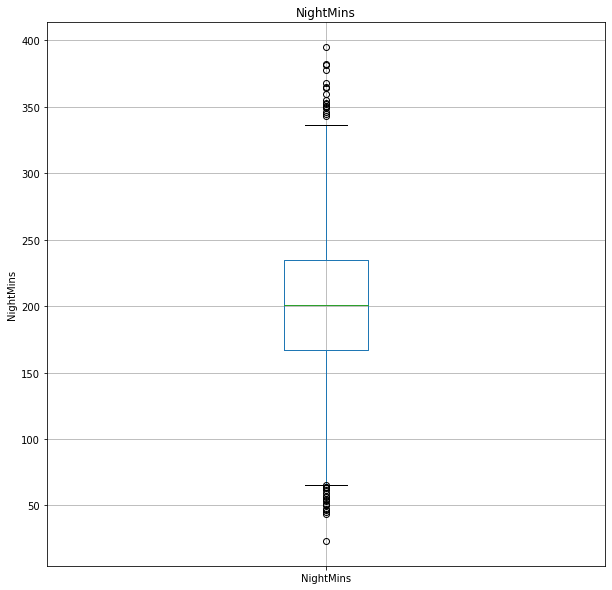

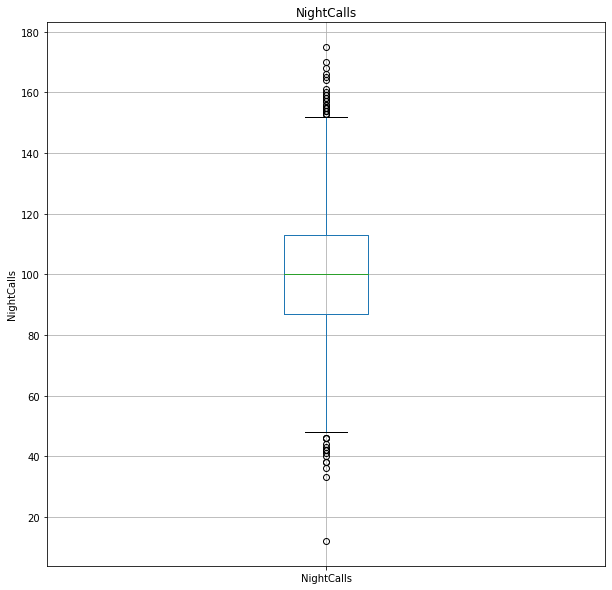

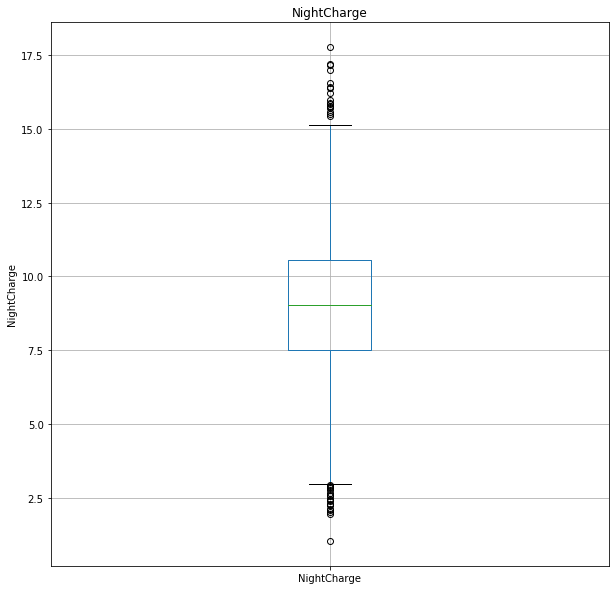

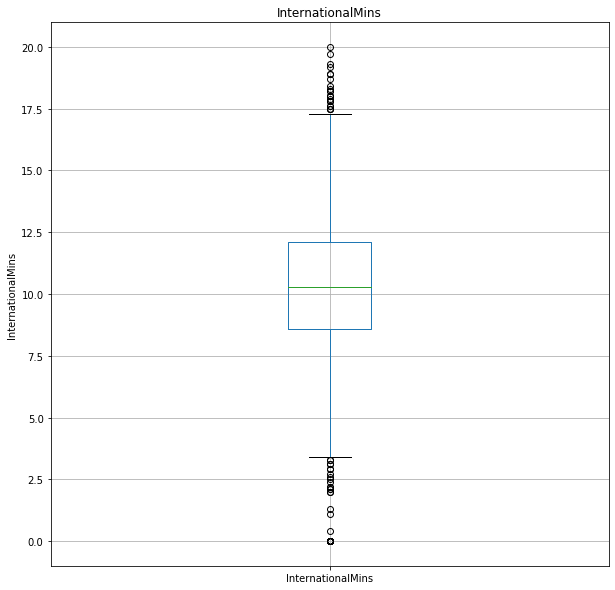

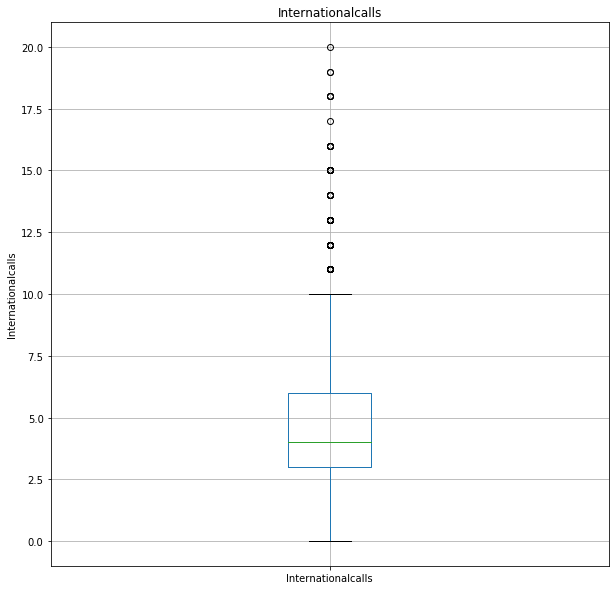

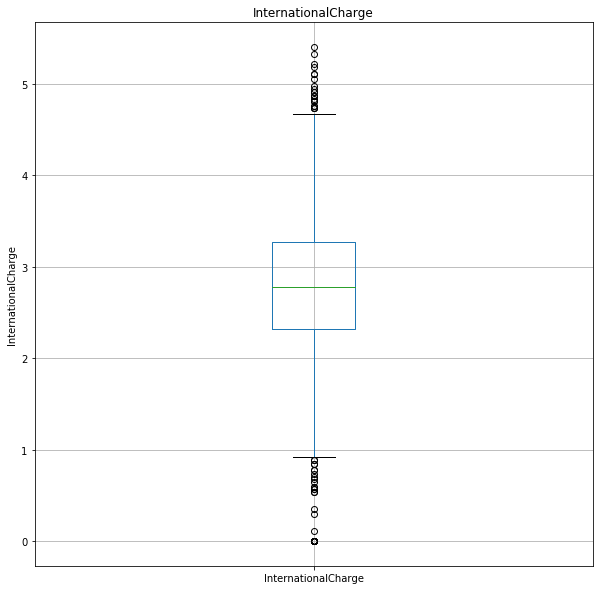

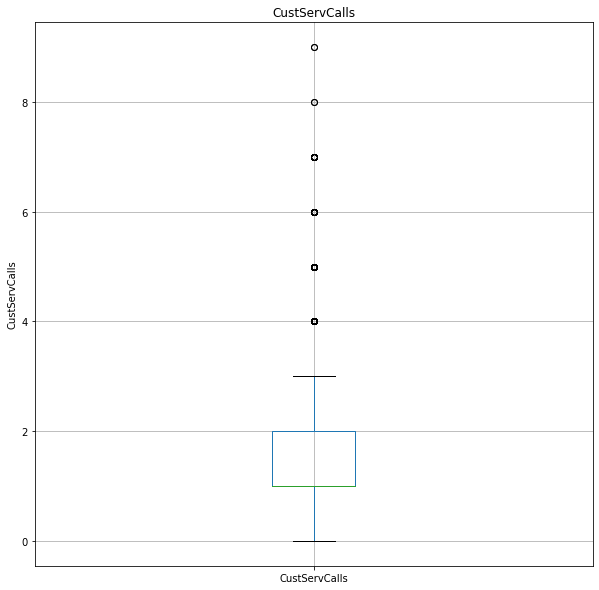

In [29]:
for feature in numerical_feature:
        
       
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

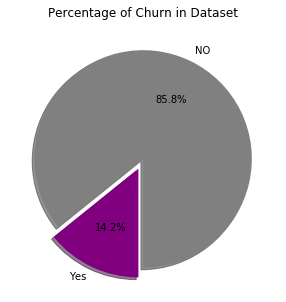

In [30]:
# Data to plot
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
explode = (0, 0.1) 
labels='NO','Yes'
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

# Churn Rate Score

Text(0.5, 1.0, 'Churn Rate')

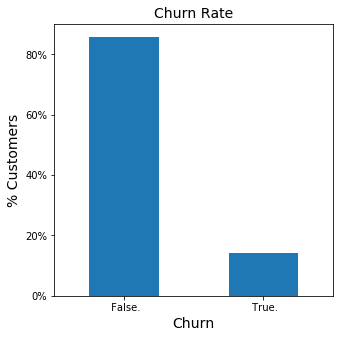

In [31]:
import matplotlib.ticker as mt
cr=(data['Churn'].value_counts()*100.0/len(data)).plot(kind='bar',stacked=True,rot=0)
cr.yaxis.set_major_formatter(mt.PercentFormatter())
cr.set_ylabel('% Customers', size=14)
cr.set_xlabel('Churn',size=14)
cr.set_title('Churn Rate',size=14)

# Feature Engineering and Feature Selection

###  Convert Categorical Features to Numerical Features

In [32]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
enc=LabelEncoder()
data.InternationalPlan=enc.fit_transform(data.InternationalPlan)
data.VMailPlan=enc.fit_transform(data.VMailPlan)
data.State=enc.fit_transform(data.State)



In [33]:
data.loc[data.Churn==' False.',"Churn_Flag"]=0
data.loc[data.Churn==' True.',"Churn_Flag"]=1
data.drop('Churn',axis=1,inplace=True)

In [34]:
Counter(data.Churn_Flag)

Counter({0.0: 3961, 1.0: 656})

In [35]:
data

,State,AccountLength,AreaCode,InternationalPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,EveMins,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,InternationalMins,Internationalcalls,InternationalCharge,CustServCalls,Churn_Flag
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0.0
4613,32,177,408,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0.0
4614,46,67,408,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0.0
4615,22,98,415,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0.0


In [36]:
#split dataset into dependent(y) and independent(x) variable
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [37]:
#lasso regression and selectmodel for feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_Sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=10))
feature_Sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=10,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [38]:
feature_Sel_model.get_support()

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False,  True])

In [39]:
#print number of total and selected features

#list of selected feature
selected_feat=x.columns[(feature_Sel_model.get_support())]

#print some  stats
print('total features:{}'.format((x.shape[1])))
print('selected feature:{} '.format(len(selected_feat)))
print('feature with coeeficient sharnk to zero:{}'.format(np.sum(feature_Sel_model.estimator_.coef_==0))) #skipped features

total features:18
selected feature:13 
feature with coeeficient sharnk to zero:5


In [40]:
x=x[selected_feat]
x.head()

,AccountLength,AreaCode,InternationalPlan,VMailMessage,DayMins,DayCalls,EveMins,EveCalls,NightMins,NightCalls,InternationalMins,Internationalcalls,CustServCalls
0,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3


# Model Buliding

In [41]:
#split dataset into training and testing set
from sklearn.model_selection import train_test_split


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3693, 13), (924, 13), (3693,), (924,))

In [44]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report,accuracy_score

# XGBOOST

In [131]:
#predict y_pred using XGBOOST classifier
from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=0.1,random_state=100,n_estimators=300)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [132]:
# find accuracy_score
accuracy_score(y_test,y_pred) #96%

0.9567099567099567

In [47]:
#confusion matrix gives information about the  number of miss clustered data
confusion_matrix(y_test,y_pred)
#here 11/796 are miss-clustered(type-1 error)
#29/88 are miss-clusttered (type-2 error)

array([[796,  11],
       [ 29,  88]], dtype=int64)

In [48]:
print("classification report:",classification_report(y_test, y_pred))
print('f1_score is:',f1_score(y_test,y_pred))
print('precision_Score is:',precision_score(y_test,y_pred))
print('recall_score is:',recall_score(y_test,y_pred))

classification report:               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       807
         1.0       0.89      0.75      0.81       117

    accuracy                           0.96       924
   macro avg       0.93      0.87      0.90       924
weighted avg       0.96      0.96      0.96       924

f1_score is: 0.8148148148148149
precision_Score is: 0.8888888888888888
recall_score is: 0.7521367521367521


In [49]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
scorelist1=[]
for i in range(1,200):
             rf_model = RandomForestClassifier(n_estimators=i,random_state=0).fit(x_train,y_train)
             y_pred1=rf_model.predict(x_test)
             scorelist1.append(accuracy_score(y_test,y_pred1))
                
          
             


In [50]:
for i,n in enumerate(scorelist1):
        print(i,n)
max(scorelist1)

0 0.8885281385281385
1 0.9199134199134199
2 0.9318181818181818
3 0.9426406926406926
4 0.948051948051948
5 0.9415584415584416
6 0.9491341991341992
7 0.948051948051948
8 0.9523809523809523
9 0.9512987012987013
10 0.9556277056277056
11 0.9556277056277056
12 0.9577922077922078
13 0.9567099567099567
14 0.9588744588744589
15 0.9545454545454546
16 0.9556277056277056
17 0.9523809523809523
18 0.9556277056277056
19 0.9556277056277056
20 0.9588744588744589
21 0.9567099567099567
22 0.9588744588744589
23 0.9567099567099567
24 0.9577922077922078
25 0.9567099567099567
26 0.9588744588744589
27 0.9577922077922078
28 0.95995670995671
29 0.95995670995671
30 0.9588744588744589
31 0.9577922077922078
32 0.9588744588744589
33 0.9588744588744589
34 0.9588744588744589
35 0.9588744588744589
36 0.9588744588744589
37 0.95995670995671
38 0.95995670995671
39 0.95995670995671
40 0.95995670995671
41 0.9588744588744589
42 0.961038961038961
43 0.9588744588744589
44 0.95995670995671
45 0.9588744588744589
46 0.9588744588

0.9621212121212122

In [51]:
r_model = RandomForestClassifier(n_estimators=75,random_state=0).fit(x_train,y_train)
y_pred1=r_model.predict(x_test)
accuracy_score(y_test,y_pred1) #96.10%
                
          

0.961038961038961

In [134]:
confusion_matrix(y_test,y_pred1)

array([[801,   6],
       [ 30,  87]], dtype=int64)

In [52]:
print("classification report:",classification_report(y_test, y_pred1))
print('f1_score is:',f1_score(y_test,y_pred1))
print('precision_Score is:',precision_score(y_test,y_pred1))
print('recall_score is:',recall_score(y_test,y_pred1))

classification report:               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       807
         1.0       0.94      0.74      0.83       117

    accuracy                           0.96       924
   macro avg       0.95      0.87      0.90       924
weighted avg       0.96      0.96      0.96       924

f1_score is: 0.8285714285714285
precision_Score is: 0.9354838709677419
recall_score is: 0.7435897435897436


# LogisticRegression

In [53]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=0).fit(x_train,y_train)

#Model Score on Valdation Data Set
y_pred2=logit_model.predict(x_test)
accuracy_score(y_test,y_pred2)

C:\Users\JESAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8733766233766234

In [54]:
print("classification report:",classification_report(y_test, y_pred2))
print('f1_score is:',f1_score(y_test,y_pred2))
print('precision_Score is:',precision_score(y_test,y_pred2))
print('recall_score is:',recall_score(y_test,y_pred2))

classification report:               precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       807
         1.0       0.50      0.07      0.12       117

    accuracy                           0.87       924
   macro avg       0.69      0.53      0.53       924
weighted avg       0.83      0.87      0.83       924

f1_score is: 0.12030075187969927
precision_Score is: 0.5
recall_score is: 0.06837606837606838


# KNeighbors(KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
score={}
scorelist=[]
for i in range(1,200):
             K_Model = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
             y_pre=K_Model.predict(x_test)
             scorelist.append(accuracy_score(y_test,y_pre))
          
             
         
      


In [56]:
KNN_Model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
y_pred3=KNN_Model.predict(x_test)
accuracy_score(y_test,y_pred3)  

0.8798701298701299

In [57]:
print("classification report:",classification_report(y_test, y_pred3))
print('f1_score is:',f1_score(y_test,y_pred3))
print('precision_Score is:',precision_score(y_test,y_pred3))
print('recall_score is:',recall_score(y_test,y_pred3))

classification report:               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       807
         1.0       0.55      0.26      0.36       117

    accuracy                           0.88       924
   macro avg       0.73      0.62      0.65       924
weighted avg       0.86      0.88      0.86       924

f1_score is: 0.35838150289017345
precision_Score is: 0.5535714285714286
recall_score is: 0.26495726495726496


# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(x_train,y_train)

#Model Score on Valdation Data Set
y_pred4=Naive_model.predict(x_test)
accuracy_score(y_test,y_pred4)  

0.8571428571428571

# Final Model-Random Forest

In [59]:
r_model = RandomForestClassifier(n_estimators=75,random_state=0).fit(x_train,y_train)
y_pred1=r_model.predict(x_test)
accuracy_score(y_test,y_pred1) #96.10%
                
          

0.961038961038961

print("classification report:",classification_report(y_test, y_pred1))
print('f1_score is:',f1_score(y_test,y_pred1))
print('precision_Score is:',precision_score(y_test,y_pred1))
print('recall_score is:',recall_score(y_test,y_pred1))

### visualize the feature importance 

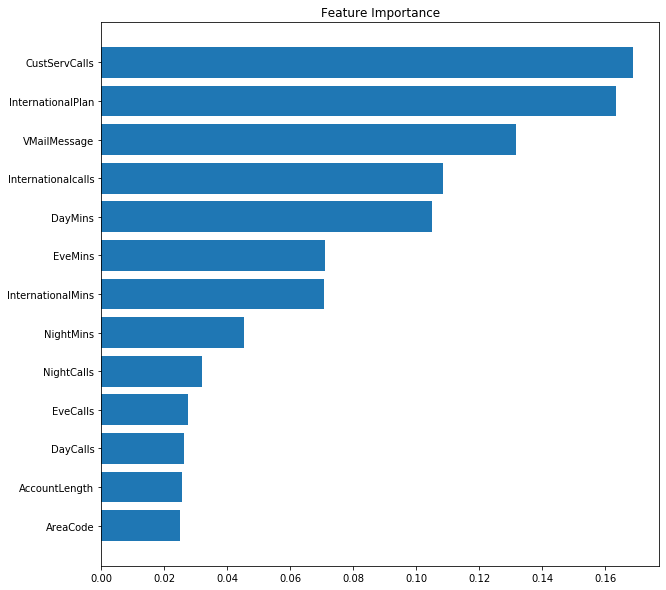

In [61]:

importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(x.shape[1]),importances[indices],align = 'center')
plt.yticks(range(x.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

In [ ]:
data.head()

#### Classify the Churned Client into three categories:high_churn,Low_churn,average_churn

In [135]:

threshold = 0.4

predicted_proba = r_model.predict_proba(x_test)

f=pd.DataFrame(predicted_proba)
h=pd.DataFrame(y_test).reset_index()

In [136]:
dataset=pd.concat([h,f],ignore_index=True,axis=1)


In [137]:
dataset

,0,1,2,3
0,556,0.0,0.960000,0.040000
1,2550,0.0,0.986667,0.013333
2,530,0.0,0.986667,0.013333
3,130,0.0,1.000000,0.000000
4,2464,0.0,0.986667,0.013333
...,...,...,...,...
919,3119,0.0,0.986667,0.013333
920,1687,0.0,0.986667,0.013333
921,4391,0.0,0.973333,0.026667
922,4044,0.0,0.693333,0.306667


In [138]:
dataset.rename(columns={1:'Churn',2:'pro_notchurn',3:'pro_churn'},inplace=True)

In [139]:
dataset.loc[(dataset.Churn==1) & (dataset.pro_churn>=0.5),'Category']='high'
dataset.loc[(dataset.Churn==1) & (dataset.pro_churn<=0.5),'Category']='low'
dataset.loc[(dataset.Churn==1) & (dataset.pro_churn>0.5) & (dataset.pro_churn<0.5) ,'Category']='avg'


In [140]:
dataset[dataset.Churn==1]

,0,Churn,pro_notchurn,pro_churn,Category
18,977,1.0,0.346667,0.653333,high
27,2155,1.0,0.320000,0.680000,high
28,214,1.0,0.146667,0.853333,high
35,2118,1.0,0.173333,0.826667,high
46,2324,1.0,0.386667,0.613333,high
...,...,...,...,...,...
893,2215,1.0,0.266667,0.733333,high
898,3847,1.0,0.200000,0.800000,high
902,1359,1.0,0.986667,0.013333,low
904,4576,1.0,0.800000,0.200000,low
